{0: {0: 4.9904761904761905, 1: 2.91904761904762}, 1: {0: 6.446987951807225, 1: 2.9289156626506028}, 2: {0: 5.272, 1: 3.6959999999999997}}


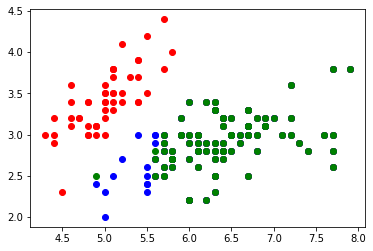

In [1]:
import numpy as np
from numpy.lib.shape_base import _kron_dispatcher
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = pd.read_csv('iris.csv')
df.head()

k = 3          #no of clusters
colors = ['red', 'blue', 'green']
species = ['setosa', 'versicolor', 'virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])

df['species'] = le.fit_transform(df['species'])

sl = df['sepal_length']
sw = df['sepal_width']
pl = df['petal_length']
pw = df['petal_width']

measure = {0: sl, 1: sw}
r2 = random.randint(0,len(sl))
r3 = random.randint(0,len(sl))
cluster = {0: {0: random.choice(df.loc[df['species'] == 0]['sepal_length']), 1: random.choice(df.loc[df['species'] == 0]['sepal_width'])}, 1: {0: sl[50], 1: sw[50]}, 2: {0: sl[100], 1: sw[100]}}
plotgr = {}


for i in range(0, 15):
  xs =[]
  ys = []
  xver = []
  yver = []
  xvi = []
  yvi = []


  for i in range(0, len(sl)):
    d1 = 0
    d2 = 0
    d3 = 0
    for j in range(0, 2):
      d1 += (cluster[0][j] - measure[j][i])*(cluster[0][j] - measure[j][i])
      d2 += (cluster[1][j] - measure[j][i])*(cluster[1][j] - measure[j][i])
      d3 += (cluster[2][j] - measure[j][i])*(cluster[2][j] - measure[j][i])
    

    minimum = min(math.sqrt(d1), math.sqrt(d2), math.sqrt(d3))

    if minimum == math.sqrt(d1):
      xs.append(measure[0][i])
      ys.append(measure[1][i])
      cluster[0][0] = sum(xs)/len(xs)
      cluster[0][1] = sum(ys)/len(ys)

    elif minimum == math.sqrt(d2):
      xver.append(measure[0][i])
      yver.append(measure[1][i])
      cluster[1][0] = sum(xver)/len(xver)
      cluster[1][1] = sum(yver)/len(yver)

    elif minimum == math.sqrt(d3):
      xvi.append(measure[0][i])
      yvi.append(measure[1][i])
      cluster[2][0] = sum(xvi)/len(xvi)
      cluster[2][1] = sum(yvi)/len(yvi)  

    plotgr = {0: {0: xs, 1: ys}, 1: {0:xver, 1: yver}, 2: {0:xvi, 1: yvi}}
    
#print(cluster, len(xs), len(xvi), len(xver))
for i in range(0, 3):
 plt.scatter(plotgr[j][0], plotgr[j][1], c = colors[i])
print(cluster)

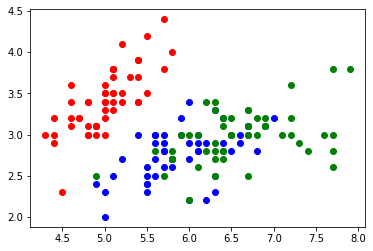

In [13]:
species = [0, 1, 2]

for i in range(3):
        x = df[df['species'] == species[i]]
        plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i])
        